<a href="https://colab.research.google.com/github/BDonadelli/Codigos-em-financas/blob/main/PadraoXFracionario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
ticker = 'ARZZ3'

In [7]:
#http://www.b3.com.br/data/files/C8/F3/08/B4/297BE410F816C9E492D828A8/SeriesHistoricas_Layout.pdf
import pandas as pd
import statistics
import requests
import os
import zipfile
import random

In [8]:
# ano = 2021
# url = 'https://bvmf.bmfbovespa.com.br/InstDados/SerHist/COTAHIST_A{:4d}.ZIP'.format(ano)

os.chdir('/home/yair/GHub/Codigos-em-financas/data')
# download = requests.get(url)


In [9]:
# data =  pd.read_csv('COTAHIST_A{:4d}.ZIP'.format(ano),compression='zip',header=None) 
data =  pd.read_csv('COTAHIST_A2024.ZIP',compression='zip',header=None) 
data

,0
0,00COTAHIST.2024BOVESPA 20240621 ...
1,012024010202AALR3 010ALLIAR ON ...
2,012024010202ABCB4 010ABC BRASIL PN EJS...
3,012024010202ABEV3 010AMBEV S/A ON EJ ...
4,012024010202BBDC3 010BRADESCO ON EJ ...
...,...
1183758,012024062182YDUQT110 080YDUQE FM ON ...
1183759,012024062182YDUQT115 080YDUQE FM ON ...
1183760,012024062138ZAMPF370E 012ZAMPE ON ...
1183761,012024062178ZAMPF370 070ZAMPE ON ...


In [10]:
n=726
data.iloc[n][0]

'012024010214MILL11      010IT NOW MILL CI           R$  000000000507100000000050970000000005017000000000506200000000050970000000005016000000000539700005000000000000000007000000000000035440000000000000009999123100000010000000000000BRMILLCTF018100'

CODNEG - CÓDIGO DE NEGOCIAÇÃO DO PAPEL (12) 13:24

In [11]:
for n in  random.choices(range(0,len(data)),k=5):
    papel=data.iloc[n][0][12:24]
    print(n,papel)

716604 MRFGQ930    
389386 RADLO235    
831483 EQTLE360    
89358 BITH11      
26485 BERK34      


PREÇO DE ABERTURA DO PAPELMERCADO NO PREGÃO (11) [57:69]
PREÇO MÁXIMO DO PAPELMERCADO NO PREGÃO (11) [70:82]
PREÇO MÍNIMO DO PAPELMERCADO NO PREGÃO (11) [83:95]
PREÇO DO ÚLTIMO NEGÓCIO DO PAPEL-MERCADO NO PREGÃO (11) [109:121]

In [25]:
n=8657
open=data.iloc[n][0][56:69]
max=data.iloc[n][0][69:82]
min=data.iloc[n][0][82:95]
close=data.iloc[n][0][108:121]

print(float(open)/100,float(max)/100,float(min)/100,float(close)/100)

21.77 21.77 21.12 21.61


DATA DO PREGÃO FORMATO “AAAAMMDD” (08) 03:10

In [13]:
dia = data.iloc[n][0][2:10]
dia

'20240429'

In [27]:
papel = [ticker+'F', ticker]
papel

['ARZZ3F', 'ARZZ3']

In [28]:
dataMinF=[]
dataMaxF=[]
dataMinP=[]
dataMaxP=[]
dataOpenF=[]
dataOpenP=[]
dataCloseF=[]
dataCloseP=[]
for n in range (0,len(data)):
  if papel[0] in data.iloc[n][0][12:24] :
    dataMinF.append([data.iloc[n][0][2:10] ,  float(data.iloc[n][0][82:95])/100])
    dataMaxF.append([data.iloc[n][0][2:10] ,  float(data.iloc[n][0][69:82])/100])
    dataOpenF.append([data.iloc[n][0][2:10] , float(data.iloc[n][0][56:69])/100])
    dataCloseF.append([data.iloc[n][0][2:10] ,float(data.iloc[n][0][108:121])/100])
  if papel[1] in data.iloc[n][0][12:24] :
    dataMinP.append([data.iloc[n][0][2:10] ,  float(data.iloc[n][0][82:95])/100])
    dataMaxP.append([data.iloc[n][0][2:10] ,  float(data.iloc[n][0][69:82])/100])
    dataOpenP.append([data.iloc[n][0][2:10] , float(data.iloc[n][0][56:69])/100])
    dataCloseP.append([data.iloc[n][0][2:10] ,float(data.iloc[n][0][108:121])/100])

In [29]:
min=[]
for f in dataMinF : 
    for p in dataMinP:
        if p[0] == f[0] : min.append([p[1],f[1]])

max=[]
for f in dataMaxF : 
    for p in dataMaxP:
        if p[0] == f[0] : max.append([p[1],f[1]])

open=[]
for f in dataOpenF : 
    for p in dataOpenP:
        if p[0] == f[0] : open.append([p[1],f[1]])

close=[]
for f in dataCloseF : 
    for p in dataCloseP:
        if p[0] == f[0] : close.append([p[1],f[1]])        

In [40]:
Dif = pd.DataFrame()
Dif['Min']   = [(x[0] - x[1]) for x in min]
Dif['Max']   = [(x[0] - x[1]) for x in max]
Dif['Open']  = [(x[0] - x[1]) for x in open]
Dif['Close'] = [(x[0] - x[1]) for x in close]

In [41]:
Dif.describe()

,Min,Max,Open,Close
count,365.000000,365.000000,365.000000,365.000000
mean,0.678904,-0.066877,0.135945,0.385315
std,1.166983,0.755145,0.908810,0.888633
min,-0.340000,-5.880000,-5.350000,-1.060000
25%,-0.010000,-0.030000,-0.130000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,1.290000,0.040000,0.250000,0.580000
max,8.110000,5.800000,5.720000,7.490000


In [46]:
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers = 'png'  ## comentar se quiser grafico interativo

fig = go.Figure()
fig.add_trace(go.Box(x=Dif['Min'] , name='Min' , boxmean='sd') )
fig.add_trace(go.Box(x=Dif['Open'] , name='Open', boxmean='sd'))
fig.add_trace(go.Box(x=Dif['Close'] , name ='Close', boxmean='sd'))
fig.add_trace(go.Box(x=Dif['Max'] , name='Max', boxmean='sd'))

fig.update_layout(
    title= f'boxplot com media e dp da diferença de preço Paadrão - Fracionário de {ticker}',
    xaxis=dict(
        showgrid=True,
        zeroline=True,
        dtick=.5,
        gridwidth=2,
    ),
)

fig.show()

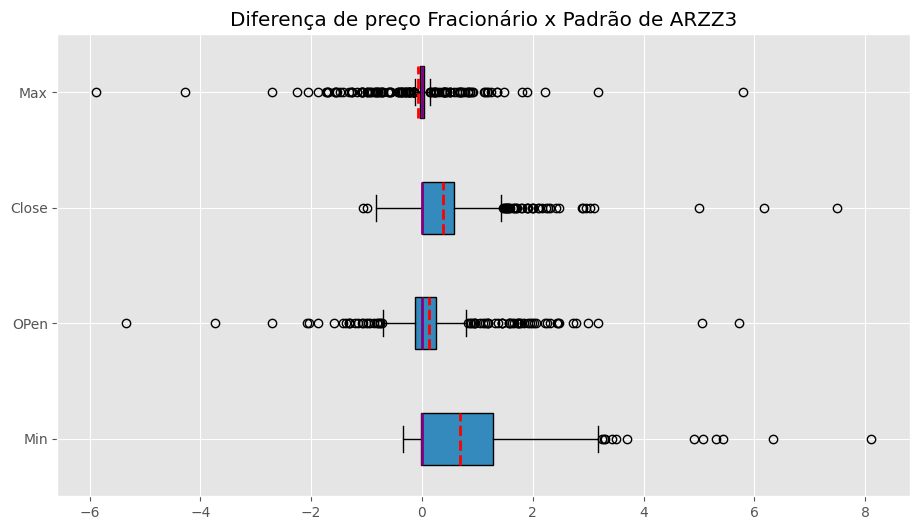

In [43]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(11, 6))
ax.boxplot((Dif['Min'], Dif['Open'] , Dif['Close'] , Dif['Max']), vert=False, showmeans=True, meanline=True,
           labels=('Min', 'OPen' , 'Close' , 'Max'), patch_artist=True,
           medianprops={'linewidth': 2, 'color': 'purple'},
           meanprops={'linewidth': 2, 'color': 'red'})
ax.set_title('Diferença de preço Fracionário x Padrão de {}'.format(papel[1]))
plt.show()

In [53]:
# from b3fileparser import B3Parser

from b3fileparser.b3parser import B3Parser


parser = B3Parser.create_parser(engine='pandas')
dados_b3 = parser.read_b3_file('COTAHIST_A2024.TXT')
dados_b3



,TIPO_DE_REGISTRO,DATA_DO_PREGAO,CODIGO_BDI,CODIGO_DE_NEGOCIACAO,TIPO_DE_MERCADO,NOME_DA_EMPRESA,ESPECIFICACAO_DO_PAPEL,PRAZO_EM_DIAS_DO_MERCADO_A_TERMO,MOEDA_DE_REFERENCIA,PRECO_DE_ABERTURA,...,NUMERO_DE_NEGOCIOS,QUANTIDADE_NEGOCIADA,VOLUME_TOTAL_NEGOCIADO,PRECO_DE_EXERCICIO,INDICADOR_DE_CORRECAO_DE_PRECOS,DATA_DE_VENCIMENTO,FATOR_DE_COTACAO,PRECO_DE_EXERCICIO_EM_PONTOS,CODIGO_ISIN,NUMERO_DE_DISTRIBUICAO
1,1,2024-01-02,2.0,AALR3,10,ALLIAR,ON NM,NaN,R$,10.20,...,1993.0,430400.0,4.014875e+08,0.0,0.0,1970-01-01 00:00:00.099991231,1.0,0.0,BRAALRACNOR6,102.0
2,1,2024-01-02,2.0,ABCB4,10,ABC BRASIL,PN EJS N2,NaN,R$,23.98,...,8964.0,1944700.0,4.494731e+09,0.0,0.0,1970-01-01 00:00:00.099991231,1.0,0.0,BRABCBACNPR4,145.0
3,1,2024-01-02,2.0,ABEV3,10,AMBEV S/A,ON EJ,NaN,R$,13.72,...,16587.0,11690200.0,1.598391e+10,0.0,0.0,1970-01-01 00:00:00.099991231,1.0,0.0,BRABEVACNOR1,127.0
4,1,2024-01-02,2.0,BBDC3,10,BRADESCO,ON EJ N1,NaN,R$,15.26,...,6674.0,4545600.0,6.857685e+09,0.0,0.0,1970-01-01 00:00:00.099991231,1.0,0.0,BRBBDCACNOR1,764.0
5,1,2024-01-02,2.0,ALPA3,10,ALPARGATAS,ON N1,NaN,R$,10.11,...,20.0,2900.0,2.912000e+06,0.0,0.0,1970-01-01 00:00:00.099991231,1.0,0.0,BRALPAACNOR0,231.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183757,1,2024-06-21,82.0,YDUQT100,80,YDUQE FM,ON NM,0.0,R$,0.42,...,3.0,4100.0,1.738000e+05,10.0,0.0,1970-01-01 00:00:00.020240816,1.0,0.0,BRYDUQACNOR3,105.0
1183758,1,2024-06-21,82.0,YDUQT110,80,YDUQE FM,ON NM,0.0,R$,0.92,...,2.0,3000.0,2.700000e+05,11.0,0.0,1970-01-01 00:00:00.020240816,1.0,0.0,BRYDUQACNOR3,105.0
1183759,1,2024-06-21,82.0,YDUQT115,80,YDUQE FM,ON NM,0.0,R$,1.16,...,2.0,4000.0,4.640000e+05,11.5,0.0,1970-01-01 00:00:00.020240816,1.0,0.0,BRYDUQACNOR3,105.0
1183760,1,2024-06-21,38.0,ZAMPF370E,12,ZAMPE,ON,0.0,R$,3.70,...,2.0,200.0,7.400000e+04,3.7,0.0,1970-01-01 00:00:00.020240621,1.0,0.0,BRZAMPACNOR5,100.0


In [60]:

puts = dados_b3[dados_b3['TIPO_DE_MERCADO'] == 80]
putspetro = puts[puts['CODIGO_DE_NEGOCIACAO'].str.startswith('PETR')]
putspetro.head()

,TIPO_DE_REGISTRO,DATA_DO_PREGAO,CODIGO_BDI,CODIGO_DE_NEGOCIACAO,TIPO_DE_MERCADO,NOME_DA_EMPRESA,ESPECIFICACAO_DO_PAPEL,PRAZO_EM_DIAS_DO_MERCADO_A_TERMO,MOEDA_DE_REFERENCIA,PRECO_DE_ABERTURA,...,NUMERO_DE_NEGOCIOS,QUANTIDADE_NEGOCIADA,VOLUME_TOTAL_NEGOCIADO,PRECO_DE_EXERCICIO,INDICADOR_DE_CORRECAO_DE_PRECOS,DATA_DE_VENCIMENTO,FATOR_DE_COTACAO,PRECO_DE_EXERCICIO_EM_PONTOS,CODIGO_ISIN,NUMERO_DE_DISTRIBUICAO
205395,1,2024-01-02,82.0,PETRM328,80,PETRE,ON N2,0.0,R$,0.05,...,1.0,2600.0,13000.0,33.67,0.0,1970-01-01 00:00:00.020240119,1.0,0.0,BRPETRACNOR9,201.0
205396,1,2024-01-02,82.0,PETRM379,80,PETRE,ON N2,0.0,R$,0.15,...,2.0,3000.0,45000.0,36.67,0.0,1970-01-01 00:00:00.020240119,1.0,0.0,BRPETRACNOR9,201.0
205397,1,2024-01-02,82.0,PETRM389,80,PETRE,ON N2,0.0,R$,0.33,...,5.0,5200.0,138700.0,37.67,0.0,1970-01-01 00:00:00.020240119,1.0,0.0,BRPETRACNOR9,201.0
205398,1,2024-01-02,82.0,PETRM399,80,PETRE FM,ON N2,0.0,R$,0.55,...,1.0,2000.0,110000.0,38.67,0.0,1970-01-01 00:00:00.020240119,1.0,0.0,BRPETRACNOR9,201.0
205399,1,2024-01-02,82.0,PETRN367,80,PETRE,ON N2,0.0,R$,0.25,...,1.0,2000.0,50000.0,35.47,0.0,1970-01-01 00:00:00.020240216,1.0,0.0,BRPETRACNOR9,201.0


https://github.com/codigoquant/b3fileparserhttps://github.com/codigoquant/b3fileparser